<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Lab_Task_Dimensionality_Reduction_using_PCA_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform Principal Component Analysis (PCA) on the dataset from '/content/energydata_complete (1).csv' to determine the optimal number of components that explain at least 90-95% of the variance, including data loading, preprocessing, feature scaling, and visualization of explained variance.

## Load and Inspect Data

### Subtask:
Load the dataset from '/content/energydata_complete (1).csv' into a pandas DataFrame. Drop the 'date' column. Check for and handle any missing values, then convert all feature columns to a float data type. Finally, display the dataset's shape, summary statistics, and the count of null values per column.


**Reasoning**:
The subtask requires loading data, dropping a column, handling missing values, converting data types, and then displaying shape, descriptive statistics, and null counts. I will perform all these operations in a single Python code block.



In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/energydata_complete (1).csv')
print("Original DataFrame head:")
print(df.head())

# Drop the 'date' column
df = df.drop('date', axis=1)
print("\nDataFrame after dropping 'date' column head:")
print(df.head())

# Check for missing values before handling
print("\nMissing values before handling:")
print(df.isnull().sum().to_string())

# Handle missing values by filling with the mean of their respective columns
df.fillna(df.mean(numeric_only=True), inplace=True)
print("\nMissing values after filling with mean:")
print(df.isnull().sum().to_string())

# Convert all columns in the DataFrame to a float data type
df = df.astype(float)
print("\nDataFrame info after converting to float:")
print(df.info())

# Display the shape of the DataFrame
print("\nDataFrame shape:", df.shape)

# Display descriptive statistics of the DataFrame
print("\nDescriptive statistics:")
print(df.describe().to_string())

# Verify that there are no remaining null values
print("\nFinal null value count per column (should be all zeros):")
print(df.isnull().sum().to_string())

Original DataFrame head:
                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_o

## Scale Features

### Subtask:
Separate the 'Appliances' column as the target variable (y) and the remaining columns as input features (X). Apply StandardScaler to scale all the input features (X) to have zero mean and unit variance. Provide a detailed explanation of why feature scaling is a necessary preprocessing step before applying PCA.


**Reasoning**:
First, I will import the necessary library for scaling, separate the features and target, and then apply StandardScaler to the features. This addresses the first four instructions of the subtask.



In [2]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('Appliances', axis=1)
y = df['Appliances']

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for better readability and to retain column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
print("Shape of X_scaled_df (scaled features):", X_scaled_df.shape)
print("\nFirst 5 rows of scaled features (X_scaled_df):")
print(X_scaled_df.head())

Shape of X (features): (19735, 27)
Shape of y (target): (19735,)
Shape of X_scaled_df (scaled features): (19735, 27)

First 5 rows of scaled features (X_scaled_df):
     lights        T1      RH_1        T2      RH_2        T3      RH_3  \
0  3.301264 -1.118645  1.843821 -0.520411  1.073683 -1.235063  1.686130   
1  3.301264 -1.118645  1.616807 -0.520411  1.057097 -1.235063  1.704566   
2  3.301264 -1.118645  1.517959 -0.520411  1.033550 -1.235063  1.748608   
3  4.561378 -1.118645  1.459321 -0.520411  1.024540 -1.235063  1.769092   
4  4.561378 -1.118645  1.526336 -0.520411  1.009797 -1.235063  1.769092   

         T4      RH_4        T5  ...        T9      RH_9     T_out  \
0 -0.908217  1.506438 -1.314903  ... -1.217324  0.958136 -0.152647   
1 -0.908217  1.604528 -1.314903  ... -1.200778  0.965363 -0.174588   
2 -0.944115  1.580918 -1.314903  ... -1.233869  0.950910 -0.196529   
3 -0.962063  1.542526 -1.314903  ... -1.233869  0.926821 -0.218470   
4 -0.962063  1.497991 -1.296832  .

### Explanation of Feature Scaling before PCA

Feature scaling is a critical preprocessing step before applying Principal Component Analysis (PCA) for several reasons:

1.  **Variance Sensitivity**: PCA is highly sensitive to the scale of the features. It works by identifying directions (principal components) along which the data varies the most. Features with larger scales (i.e., higher variances or wider ranges of values) will naturally contribute more to the variance calculation and thus dominate the principal components, regardless of their actual predictive power or importance.

2.  **Equal Contribution**: When features are not scaled, a feature measured in units of, for example, hundreds or thousands (like 'Press_mm_hg' or 'Visibility' in some datasets) would have a much larger variance than a feature measured in single digits (like 'T1' or 'RH_1'). Without scaling, PCA would primarily focus on capturing the variance of the high-scale features, effectively downplaying or ignoring the contributions of lower-scale features. This leads to principal components that are biased towards the features with the largest magnitudes.

3.  **Meaningful Directions**: Scaling ensures that all features contribute equally to the distance calculations and variance explained. By standardizing features to have a mean of 0 and a standard deviation of 1, we put them on the same footing. This allows PCA to find principal components that truly represent the directions of maximum variance in the underlying data structure, rather than being artifacts of differing measurement scales.

4.  **Improved Performance**: In many cases, performing PCA on unscaled data can lead to suboptimal or misleading results because the principal components might not effectively capture the most important sources of variation across all features. Scaling helps PCA to identify the true underlying patterns and relationships in the data more accurately.

## Fit PCA and Plot Explained Variance

### Subtask:
Instantiate and fit a PCA object on the scaled input features. Extract the eigenvalues and the explained variance ratio for each principal component. Generate a scree plot to visualize the explained variance ratio for each component, which helps in identifying the number of important components.


**Reasoning**:
I will import `PCA` and `matplotlib.pyplot`, instantiate and fit the PCA model to the scaled features, extract the explained variance ratios, and then generate a scree plot to visualize these ratios as per the instructions.



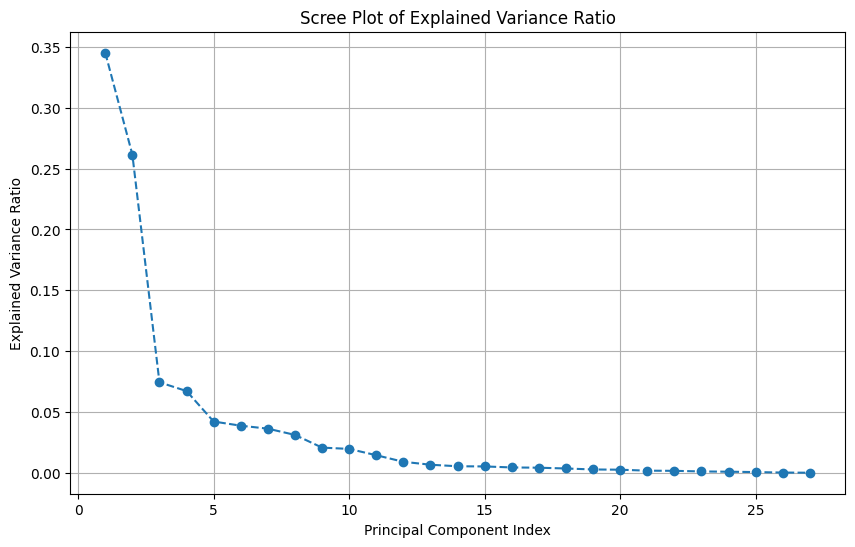

Explained Variance Ratio for each component:
PC 1: 0.3453
PC 2: 0.2616
PC 3: 0.0743
PC 4: 0.0671
PC 5: 0.0421
PC 6: 0.0387
PC 7: 0.0362
PC 8: 0.0311
PC 9: 0.0206
PC 10: 0.0196
PC 11: 0.0144
PC 12: 0.0090
PC 13: 0.0066
PC 14: 0.0053
PC 15: 0.0052
PC 16: 0.0043
PC 17: 0.0041
PC 18: 0.0035
PC 19: 0.0027
PC 20: 0.0025
PC 21: 0.0017
PC 22: 0.0016
PC 23: 0.0011
PC 24: 0.0008
PC 25: 0.0005
PC 26: 0.0001
PC 27: 0.0000


In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Instantiate PCA without specifying n_components to keep all components
pca = PCA()

# Fit PCA to the scaled features
pca.fit(X_scaled_df)

# Extract explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Generate a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot of Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

print("Explained Variance Ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC {i+1}: {ratio:.4f}")

**Reasoning**:
I will calculate the cumulative explained variance from the `explained_variance_ratio` to determine the number of components required to explain at least 90-95% of the variance. I will then print this information.



In [4]:
import numpy as np

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components for 90% and 95% variance
n_components_90 = np.where(cumulative_explained_variance >= 0.90)[0][0] + 1
n_components_95 = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1

print("Cumulative Explained Variance:")
for i, cum_ratio in enumerate(cumulative_explained_variance):
    print(f"PC {i+1}: {cum_ratio:.4f}")

print(f"\nNumber of components to explain at least 90% of variance: {n_components_90}")
print(f"Number of components to explain at least 95% of variance: {n_components_95}")


Cumulative Explained Variance:
PC 1: 0.3453
PC 2: 0.6069
PC 3: 0.6812
PC 4: 0.7484
PC 5: 0.7904
PC 6: 0.8291
PC 7: 0.8653
PC 8: 0.8964
PC 9: 0.9171
PC 10: 0.9367
PC 11: 0.9511
PC 12: 0.9600
PC 13: 0.9666
PC 14: 0.9719
PC 15: 0.9771
PC 16: 0.9814
PC 17: 0.9856
PC 18: 0.9890
PC 19: 0.9917
PC 20: 0.9942
PC 21: 0.9959
PC 22: 0.9974
PC 23: 0.9985
PC 24: 0.9993
PC 25: 0.9999
PC 26: 1.0000
PC 27: 1.0000

Number of components to explain at least 90% of variance: 9
Number of components to explain at least 95% of variance: 11


## Determine Optimal Number of Components

### Subtask:
Generate a plot of the cumulative explained variance and use it to justify the selected number of components, clearly indicating where 90-95% variance is achieved.


**Reasoning**:
I will generate a plot of the cumulative explained variance, including horizontal lines for 90% and 95% thresholds, and vertical lines indicating the number of components needed to reach those thresholds. This will visually justify the selected number of components.



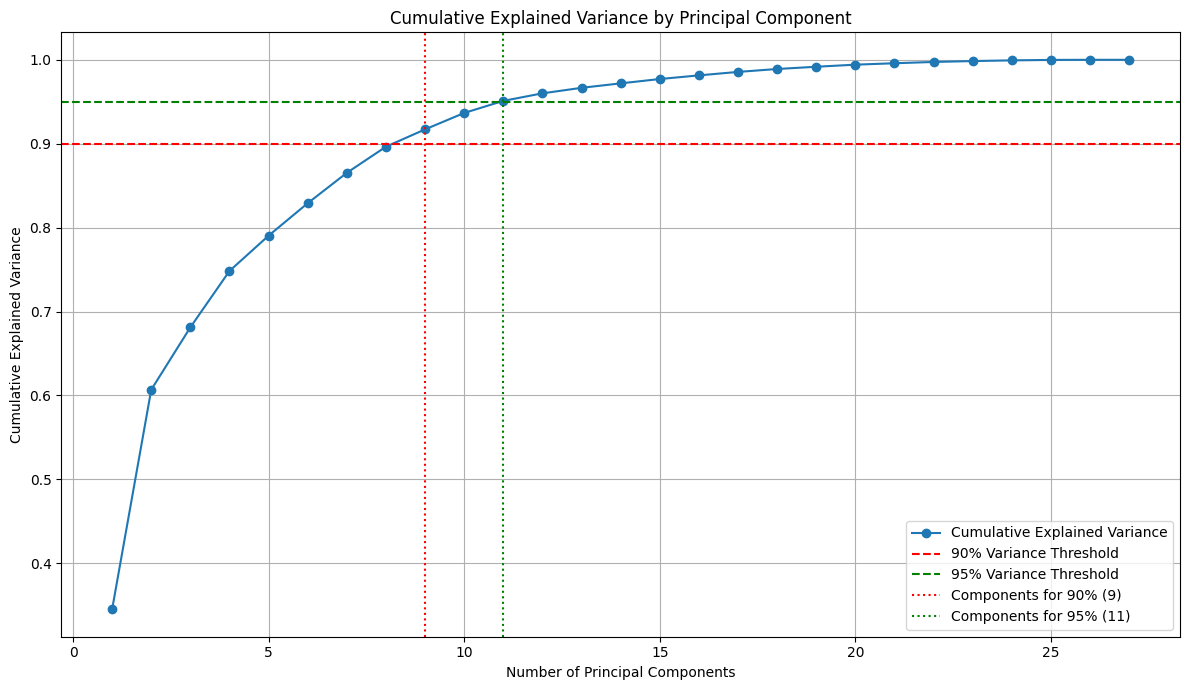

In [5]:
import matplotlib.pyplot as plt

# Plot the cumulative explained variance
plt.figure(figsize=(12, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')

# Add horizontal lines for 90% and 95% variance
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance Threshold')

# Add vertical lines for the number of components at 90% and 95%
plt.axvline(x=n_components_90, color='r', linestyle=':', label=f'Components for 90% ({n_components_90})')
plt.axvline(x=n_components_95, color='g', linestyle=':', label=f'Components for 95% ({n_components_95})')

plt.title('Cumulative Explained Variance by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the findings from the PCA analysis, including the determined optimal number of components and the insights gained from the explained variance plots.


## Summary:

### Q&A
The optimal number of components required to explain at least 90% of the variance is 9. To explain at least 95% of the variance, 11 principal components are needed.

### Data Analysis Key Findings
*   The initial dataset, after dropping the 'date' column, consisted of 19,735 rows and 28 columns. All columns were successfully converted to `float64`, and no missing values were present.
*   Feature scaling using `StandardScaler` was applied to ensure all features contributed equally to the PCA, preventing features with larger magnitudes from disproportionately influencing the principal components.
*   The first principal component (PC 1) accounts for approximately 34.53% of the total variance, while the second principal component (PC 2) explains about 26.16%.
*   A cumulative explained variance analysis revealed that 9 principal components are sufficient to capture at least 90% of the total variance.
*   To capture at least 95% of the total variance, 11 principal components are required.

### Insights or Next Steps
*   The dataset's dimensionality can be significantly reduced from 27 original features to 9 or 11 principal components while retaining 90-95% of the variance, potentially simplifying subsequent modeling and reducing computational complexity.
*   Proceed with using the selected number of principal components (e.g., 9 or 11) as input for training machine learning models for the 'Appliances' prediction task, evaluating if this dimensionality reduction improves model performance or training efficiency.
